In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
y = y.astype(int)

# 1. Загрузка и исследование данных


In [2]:
# Распределения по классам

for i in range(10):
    count = np.sum(y == i)
    print(f"Цифра {i}: {count} примеров ({count/len(y)*100:.2f}%)")


Цифра 0: 6903 примеров (9.86%)
Цифра 1: 7877 примеров (11.25%)
Цифра 2: 6990 примеров (9.99%)
Цифра 3: 7141 примеров (10.20%)
Цифра 4: 6824 примеров (9.75%)
Цифра 5: 6313 примеров (9.02%)
Цифра 6: 6876 примеров (9.82%)
Цифра 7: 7293 примеров (10.42%)
Цифра 8: 6825 примеров (9.75%)
Цифра 9: 6958 примеров (9.94%)


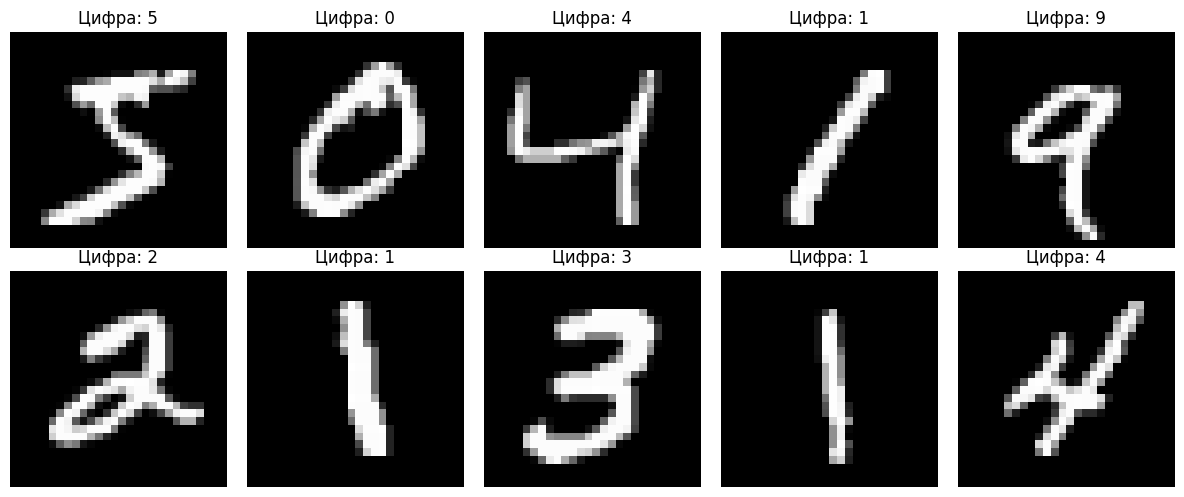

In [3]:
# Примеры изображений

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img = X.iloc[i].values.reshape(28, 28) if hasattr(X, 'iloc') else X[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Цифра: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
sample_pixels = X.iloc[0].values if hasattr(X, 'iloc') else X[0]
print(f"Минимальное значение пикселя: {np.min(sample_pixels)}")
print(f"Максимальное значение пикселя: {np.max(sample_pixels)}")
print(f"Среднее значение пикселя: {np.mean(sample_pixels):.2f}")
print(f"Стандартное отклонение: {np.std(sample_pixels):.2f}")

Минимальное значение пикселя: 0
Максимальное значение пикселя: 255
Среднее значение пикселя: 35.11
Стандартное отклонение: 79.65


## Выводы:

 - Набор изображений в чб формате (значения пикселей от 0 до 255). Данные нуждаются в нормализации, так как методы чувствительны к масштабу
 - В контексте компьютерного зрения признаки - это числовые характеристики изображения, необходимо это для того, чтобы модель лучше извлекала признаки

# 2. Постановка задачи.

Выбраны следующие метрики качества:

- Точность - Accuracy доля правильно классифицированных объектов
- F1-мера - гармоническое среднее точности и полноты

Выбраны эти метрики, так как MNIST является сбалансированным датасетом. Точность хорошо отражает общую эффективность классификатора. F1-мера учитывает и precision, и recall, что важно для многоклассовой классификации.

В качестве функции потерь берём кросс-энтропию, так как она измеряет разницу распределений между метками и классами.

Функция потерь используется в процессе обучения модели для оптимизации параметров, а метрика качества необходима для оценивания модели после обучения.

In [5]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape[0]} примеров")
print(f"Тестовая выборка: {X_test.shape[0]} примеров")

Обучающая выборка: 56000 примеров
Тестовая выборка: 14000 примеров


# 3. Классификатор kNN



In [6]:
# Без нормализации
knn_baseline = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_baseline.fit(X_train, y_train)
y_pred_baseline = knn_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"\nБез нормализации:")
print(f"Точность: {accuracy_baseline:.4f}")
print(f"F1-мера: {f1_score(y_test, y_pred_baseline, average='weighted'):.4f}")

# С нормализацией StandardScaler
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

knn_standard = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_standard.fit(X_train_standard, y_train)
y_pred_standard = knn_standard.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)

print(f"\nС нормализацией StandardScaler:")
print(f"Точность: {accuracy_standard:.4f}")
print(f"F1-мера: {f1_score(y_test, y_pred_standard, average='weighted'):.4f}")

# С нормализацией MinMaxScaler (к [0, 1])
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

knn_minmax = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = knn_minmax.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)

print(f"\nС нормализацией MinMaxScaler (к [0, 1]):")
print(f"Точность: {accuracy_minmax:.4f}")
print(f"F1-мера: {f1_score(y_test, y_pred_minmax, average='weighted'):.4f}")


Без нормализации:
Точность: 0.9696
F1-мера: 0.9696

С нормализацией StandardScaler:
Точность: 0.9444
F1-мера: 0.9443

С нормализацией MinMaxScaler (к [0, 1]):
Точность: 0.9697
F1-мера: 0.9697


## Выводы

Без нормализации модель показывает хорошие результаты, так как этот датасет и так имеет значения от 0 до 255

Нормализация StandardScaler ухудшила результаты, так как он преобразует данные в диапозон от 0 до 1, где среднее - 0, 1 - стандартное отклонение, а в нашем датасете большая часть пикселей это нули.

MinMaxScaler приводит изначальные значения датасета [0, 255] к значению [0, 1], поэтому модель отработала примерно также, как и без нормализации.

Значение k=3, метрика euclidean
Значение k=3, метрика manhattan
Значение k=5, метрика euclidean
Значение k=5, метрика manhattan
Значение k=10, метрика euclidean
Значение k=10, метрика manhattan


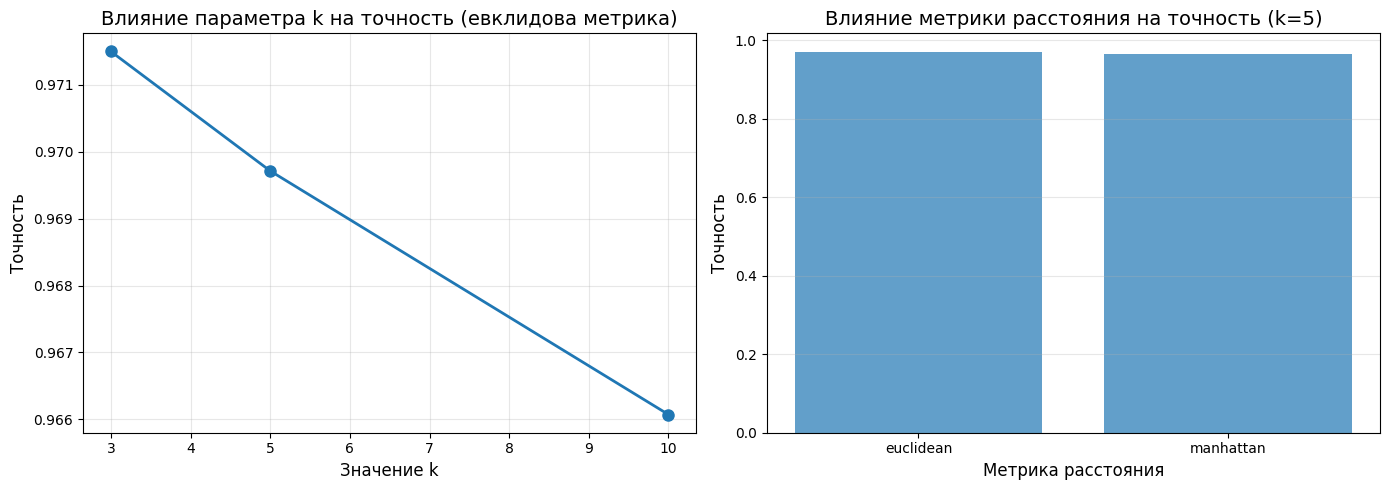


Лучшая комбинация параметров:
  k = 3, метрика = euclidean
  Точность = 0.9715


In [7]:
# Разные значения k
k_values = [3, 5, 10]
metrics = ['euclidean', 'manhattan']

results = []

for k in k_values:
    for metric in metrics:
        print(f"Значение k={k}, метрика {metric}")
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_minmax, y_train)  # Используем нормализованные данные
        y_pred = knn.predict(X_test_minmax)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((k, metric, accuracy))

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График для разных k (евклидова метрика)
k_results_euclidean = [(k, acc) for k, metric, acc in results if metric == 'euclidean']
k_vals, acc_vals = zip(*k_results_euclidean)
axes[0].plot(k_vals, acc_vals, 'o-', linewidth=2, markersize=8)
axes[0].set_xlabel('Значение k', fontsize=12)
axes[0].set_ylabel('Точность', fontsize=12)
axes[0].set_title('Влияние параметра k на точность (евклидова метрика)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# График для разных метрик (k=5)
metric_results_k5 = [(metric, acc) for k, metric, acc in results if k == 5]
metrics_names, acc_vals_metric = zip(*metric_results_k5)
x_pos = np.arange(len(metrics_names))
axes[1].bar(x_pos, acc_vals_metric, alpha=0.7)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(metrics_names)
axes[1].set_xlabel('Метрика расстояния', fontsize=12)
axes[1].set_ylabel('Точность', fontsize=12)
axes[1].set_title('Влияние метрики расстояния на точность (k=5)', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Вывод лучших параметров
best_result = max(results, key=lambda x: x[2])
print(f"\nЛучшая комбинация параметров:")
print(f"  k = {best_result[0]}, метрика = {best_result[1]}")
print(f"  Точность = {best_result[2]:.4f}")

# 4. Наивный байесовский классификатор

In [8]:
# Наивный байес

gnb = GaussianNB()
gnb.fit(X_train_minmax, y_train)
y_pred_gnb = gnb.predict(X_test_minmax)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print(f"\nGaussianNB (с нормализацией MinMax):")
print(f"Точность: {accuracy_gnb:.4f}")
print(f"F1-мера: {f1_score(y_test, y_pred_gnb, average='weighted'):.4f}")

# BernoulliNB (предполагает бинарные признаки)
# Преобразуем признаки в бинарные (пиксель > 0.5)
X_train_binary = (X_train_minmax > 0.5).astype(int)
X_test_binary = (X_test_minmax > 0.5).astype(int)

bnb = BernoulliNB()
bnb.fit(X_train_binary, y_train)
y_pred_bnb = bnb.predict(X_test_binary)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

print(f"\nBernoulliNB (бинарные признаки, порог 0.5):")
print(f"Точность: {accuracy_bnb:.4f}")
print(f"F1-мера: {f1_score(y_test, y_pred_bnb, average='weighted'):.4f}")


GaussianNB (с нормализацией MinMax):
Точность: 0.5539
F1-мера: 0.5171

BernoulliNB (бинарные признаки, порог 0.5):
Точность: 0.8343
F1-мера: 0.8340


In [9]:
# GaussianNB без нормализации
gnb_no_norm = GaussianNB()
gnb_no_norm.fit(X_train, y_train)
y_pred_gnb_no_norm = gnb_no_norm.predict(X_test)
accuracy_gnb_no_norm = accuracy_score(y_test, y_pred_gnb_no_norm)

print(f"\nGaussianNB без нормализации:")
print(f"Точность: {accuracy_gnb_no_norm:.4f}")

print(f"\nGaussianNB с нормализацией MinMax:")
print(f"Точность: {accuracy_gnb:.4f}")


GaussianNB без нормализации:
Точность: 0.5539

GaussianNB с нормализацией MinMax:
Точность: 0.5539



Лучший kNN (k=3, metric=euclidean):
  Точность: 0.9715

GaussianNB с нормализацией:
  Точность: 0.5539

BernoulliNB (бинарные признаки):
  Точность: 0.8343


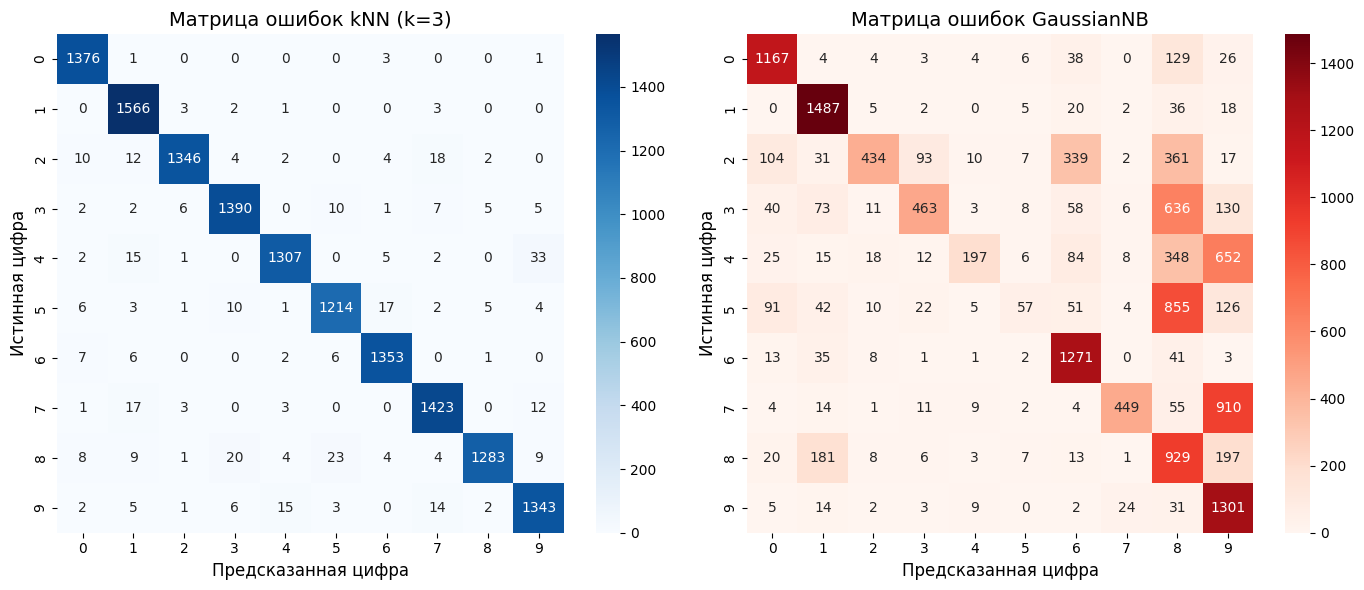

In [12]:
# Сравнение с kNN
print(f"\nЛучший kNN (k={best_result[0]}, metric={best_result[1]}):")
print(f"  Точность: {best_result[2]:.4f}")

print(f"\nGaussianNB с нормализацией:")
print(f"  Точность: {accuracy_gnb:.4f}")

print(f"\nBernoulliNB (бинарные признаки):")
print(f"  Точность: {accuracy_bnb:.4f}")

# Матрицы ошибок для сравнения
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Матрица ошибок для kNN
knn_best = KNeighborsClassifier(n_neighbors=best_result[0], metric=best_result[1])
knn_best.fit(X_train_minmax, y_train)
y_pred_knn_best = knn_best.predict(X_test_minmax)
cm_knn = confusion_matrix(y_test, y_pred_knn_best)

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Предсказанная цифра', fontsize=12)
axes[0].set_ylabel('Истинная цифра', fontsize=12)
axes[0].set_title(f'Матрица ошибок kNN (k={best_result[0]})', fontsize=14)

# Матрица ошибок для GaussianNB
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_xlabel('Предсказанная цифра', fontsize=12)
axes[1].set_ylabel('Истинная цифра', fontsize=12)
axes[1].set_title('Матрица ошибок GaussianNB', fontsize=14)

plt.tight_layout()
plt.show()

## Выводы

- Для наивного байеса нормализация важна. GaussianNB предполагает нормальное распределение. BernoulliNB лучше работает с бинарными данными
- kNN показал лучшее качество на этой задаче

# 5. Проверка предположения IID

In [13]:
# Создаем нарушение IID: убираем некоторые классы из обучения
# Оставляем только цифры 0-4 в обучающей выборке

mask_train = y_train < 5
X_train_iid = X_train_minmax[mask_train]
y_train_iid = y_train[mask_train]

# В тестовой выборке оставляем все цифры 0-9
print(f"\nОбучающая выборка (только цифры 0-4):")
print(f"  Размер: {X_train_iid.shape[0]} примеров")
print(f"  Классы: {np.unique(y_train_iid)}")

print(f"\nТестовая выборка (все цифры 0-9):")
print(f"  Размер: {X_test_minmax.shape[0]} примеров")
print(f"  Классы: {np.unique(y_test)}")

# Обучаем модели на нарушенных данных
# kNN
knn_iid = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_iid.fit(X_train_iid, y_train_iid)
y_pred_knn_iid = knn_iid.predict(X_test_minmax)
accuracy_knn_iid = accuracy_score(y_test, y_pred_knn_iid)

# GaussianNB
gnb_iid = GaussianNB()
gnb_iid.fit(X_train_iid, y_train_iid)
y_pred_gnb_iid = gnb_iid.predict(X_test_minmax)
accuracy_gnb_iid = accuracy_score(y_test, y_pred_gnb_iid)

print(f"\nРезультаты при нарушении IID:")
print(f"kNN точность: {accuracy_knn_iid:.4f}")
print(f"GaussianNB точность: {accuracy_gnb_iid:.4f}")

# Сравнение с результатами на полных данных
print(f"\nСравнение с полными данными:")
print(f"kNN (полные данные): {best_result[2]:.4f}")
print(f"kNN (нарушение IID):  {accuracy_knn_iid:.4f}")
print(f"Падение точности kNN: {(best_result[2] - accuracy_knn_iid)*100:.2f}%")

print(f"\nGaussianNB (полные данные): {accuracy_gnb:.4f}")
print(f"GaussianNB (нарушение IID):  {accuracy_gnb_iid:.4f}")
print(f"Падение точности GaussianNB: {(accuracy_gnb - accuracy_gnb_iid)*100:.2f}%")

# Анализ ошибок для классов, которых не было в обучении
mask_test_new = y_test >= 5
if np.any(mask_test_new):
    y_test_new = y_test[mask_test_new]
    y_pred_knn_new = y_pred_knn_iid[mask_test_new]
    y_pred_gnb_new = y_pred_gnb_iid[mask_test_new]

    accuracy_knn_new = accuracy_score(y_test_new, y_pred_knn_new)
    accuracy_gnb_new = accuracy_score(y_test_new, y_pred_gnb_new)

    print(f"Точность kNN на новых классах (5-9): {accuracy_knn_new:.4f}")
    print(f"Точность GaussianNB на новых классах (5-9): {accuracy_gnb_new:.4f}")

    # Посмотрим, как классификаторы ошибаются
    print("\nПримеры предсказаний для цифры 7 (которой не было в обучении):")
    indices_7 = np.where((y_test == 7) & mask_test_new)[0][:5]
    for idx in indices_7[:3]:  # Покажем 3 примера
        pred_knn = y_pred_knn_iid[idx]
        pred_gnb = y_pred_gnb_iid[idx]
        true_label = y_test[idx]
        print(f"  Истинная цифра: {true_label}, kNN предсказал: {pred_knn}, GaussianNB предсказал: {pred_gnb}")


Обучающая выборка (только цифры 0-4):
  Размер: 28588 примеров
  Классы: [0 1 2 3 4]

Тестовая выборка (все цифры 0-9):
  Размер: 14000 примеров
  Классы: [0 1 2 3 4 5 6 7 8 9]

Результаты при нарушении IID:
kNN точность: 0.5051
GaussianNB точность: 0.4196

Сравнение с полными данными:
kNN (полные данные): 0.9715
kNN (нарушение IID):  0.5051
Падение точности kNN: 46.64%

GaussianNB (полные данные): 0.5539
GaussianNB (нарушение IID):  0.4196
Падение точности GaussianNB: 13.43%
Точность kNN на новых классах (5-9): 0.0000
Точность GaussianNB на новых классах (5-9): 0.0000

Примеры предсказаний для цифры 7 (которой не было в обучении):
  Истинная цифра: 7, kNN предсказал: 3, GaussianNB предсказал: 4
  Истинная цифра: 7, kNN предсказал: 3, GaussianNB предсказал: 4
  Истинная цифра: 7, kNN предсказал: 4, GaussianNB предсказал: 4


# 6. Итоги и выводы

1) Влияние нормализации:
- kNN: Критически зависит от нормализации. При неправильном выборе метода точность падает критически
- Naive Bayes: GaussianNB требует стандартизации, BernoulliNB работает с бинарными данными. Нормализация менее критична, но влияет на качество

2) Выбор метрики и параметров: 
- Оптимальные гиперпараметры для kNN: k = 3, евклидова метрика
- Naive Bayes: Лучший результат показывает BernoulliNB с бинаризацией. Предположение о независимости признаков нарушается, но метод остаётся полезным

3) Нарушение предположения IID:
- kNN более устойчив к нарушению распределению исходной выборки
- Результаты Naive Bayes сильно ухудшаются, если обучать на не полных данных

4) Сравнение качества на MNIST:
- kNN справился с задачей на порядок лучше, демонстрируя точность в 97%, Naive Bayes: 83%





# Вопросы для отчета

1) Признак - это измеряемая характеристика объекта, признаками могут быть интенсивности цветов пикселей, гистограммы градиентов, цвета, формы объектов и т.д. kNN использует расстояния между объектами. Без нормализации признаки с большим диапазоном значений будут доминировать в вычислении расстояния.

2) IID - Independent and Identically Distributed. Подразумевает под собой независимость каждого объекта внутри датасета, все примеры одинакого распределены. Это помогает оценивать качество модели на тестовой выборке, если она одинаково распределена с обучающей. Можно нарушить следующим образом: взять разные рампределения для обучающей и тестовой выборкой, убрать классы из обучения или использовать разные датасеты для обучения и оценки качества.

3) Функция потерь измеряет ошибку предсказания, пример: кросс-энтропия. Функция потерь оптимизируется в процессе обучения, а метрика качества оценивает итоговое качество модели.

4) Параметры модели - обучаемые веса, гиперпараметры - настраиваемые человеком параметры модели. Приеры параметров kNN: обучающая выборка, гиперпараметры: k, метрика расстояния. Гиперпараметры наивного байеса: тип распределения, параметры: средние и дисперсии для каждого класса.

5) Функция потерь: используется в процессе обучения для оптимизации, должна быть дифференцируемой. Метрика качества: используется для итоговой оценки модели, может быть недифференцируемой. Метрика качества показывает, насколько хорошо модель решает конкретную практическую задачу.